Enter ticker here: zs


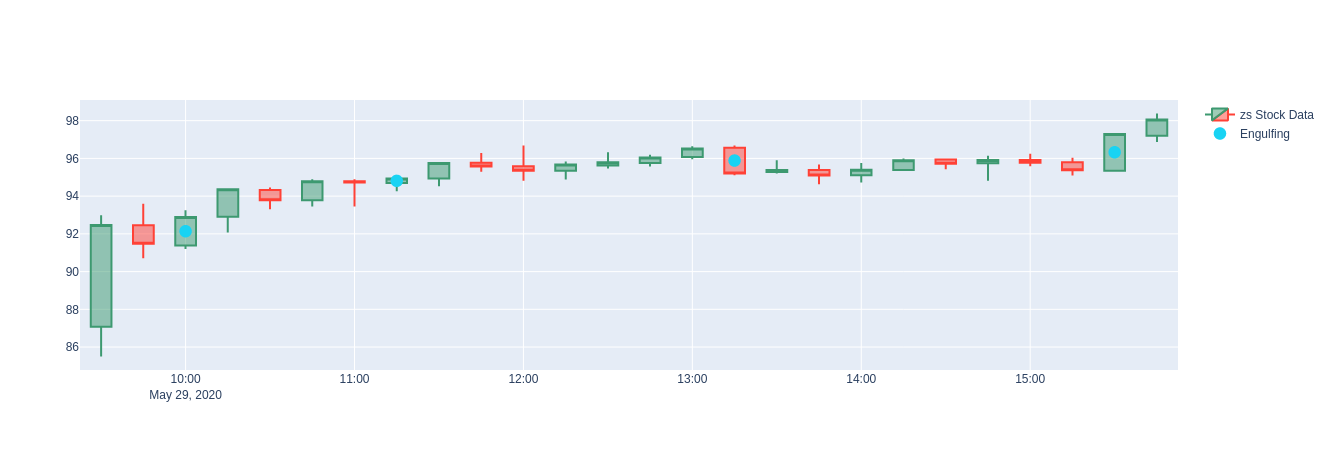

In [11]:
# importing necessary libraries
import talib
import yfinance as yf
import plotly.graph_objects as go
import numpy as np
# Acquire the stock to analyze from user input
ticker = str(input('Enter ticker here:'))
stock = yf.Ticker(ticker)
# Get the stock's historical data
df = stock.history(period='1d', interval='15m')
# Get the 'middle' column in the dataframe, to be able to display candlestick indicators
# in the middle of the candlestick to look fancy and not trigger OCD
df['Middle'] = (df['Close'] + df['Open'])/2
# fetch every indicator, replace 0 values (when indicator = False) to NaN, then drop NaN values
crows = talib.CDL3BLACKCROWS(df.Open, df.High, df.Low, df.Close)
crows.replace(0, np.nan, inplace=True)
crows.dropna(inplace=True)
knights = talib.CDL3WHITESOLDIERS(df.Open, df.High, df.Low, df.Close)
knights.replace(0, np.nan, inplace=True)
knights.dropna(inplace=True)
mstars = talib.CDLMORNINGSTAR(df.Open, df.High, df.Low, df.Close)
mstars.replace(0, np.nan, inplace=True)
mstars.dropna(inplace=True)
estars = talib.CDLEVENINGSTAR(open=df.Open, high = df.High, low=df.Low, close=df.Close)
estars.replace(0, np.nan, inplace=True)
estars.dropna(inplace=True)
engulf = talib.CDLENGULFING(df.Open, df.High, df.Low, df.Close)
engulf.replace(0, np.nan, inplace=True)
engulf.dropna(inplace=True)
# Assign the text on hover for bearish and bullish patterns
engulf[engulf == 100] = 'Bullish Engulfing'
engulf[engulf == -100] = 'Bearish Engulfing'
mstars[mstars == 100] = 'Morningstar'
estars[estars == -100] = 'Eveningstar'
knights[knights == 100] = 'Three White Knights'
crows[crows == -100] = 'Three White Crows'
# Make the seperate charts that, overlaid, convey both the candlestick for the stock as well as the indicators
candle_trace = go.Candlestick(x=df.index, open=df.Open, high=df.High, low=df.Low, close=df.Close, name=str(ticker)+' Stock Data')
crow_trace = go.Scatter(x=crows.index, y=df['Middle'][crows.index], mode='markers', marker={'size':12.5}, text=crows, name='Crows')
knight_trace = go.Scatter(x=knights.index, y=df['Middle'][knights.index], mode='markers', marker={'size':12.5}, text=knights, name='Three White Knights')
mstars_trace = go.Scatter(x=mstars.index, y=df['Middle'][mstars.index], mode='markers', marker={'size':12.5}, text=mstars, name='Morningstar')
estars_trace = go.Scatter(x=estars.index, y=df['Middle'][estars.index], mode='markers', marker={'size':12.5}, text=estars, name='Eveningstar')
engulf_trace = go.Scatter(x=engulf.index, y=df['Middle'][engulf.index], mode='markers', marker={'size':12.5}, text=engulf, name='Engulfing')
# Here we actually create the figure and display it (figure means graph here)
fig = go.Figure(data=[candle_trace, crow_trace, knight_trace, mstars_trace, estars_trace, engulf_trace])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [2]:
 ## IGNORE BOTTOM STUFF: IT'S UNIMPORTANT ##
##     It's a copy of the above code,     ##
# but as it was created and unconsolidated #

In [3]:
import talib
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [5]:
ticker = str(input('Enter ticker here:'))

Enter ticker here: spy


In [6]:
stock = yf.Ticker(ticker)
df = stock.history(period='1d', interval='15m')
df['Middle'] = (df['Close'] + df['Open'])/2

In [7]:
crows = talib.CDL3BLACKCROWS(df.Open, df.High, df.Low, df.Close)
crows.replace(0, np.nan, inplace=True)
crows.dropna(inplace=True)
knights = talib.CDL3WHITESOLDIERS(df.Open, df.High, df.Low, df.Close)
knights.replace(0, np.nan, inplace=True)
knights.dropna(inplace=True)
mstars = talib.CDLMORNINGSTAR(df.Open, df.High, df.Low, df.Close)
mstars.replace(0, np.nan, inplace=True)
mstars.dropna(inplace=True)
estars = talib.CDLEVENINGSTAR(open=df.Open, high = df.High, low=df.Low, close=df.Close)
estars.replace(0, np.nan, inplace=True)
estars.dropna(inplace=True)
engulf = talib.CDLENGULFING(df.Open, df.High, df.Low, df.Close)
engulf.replace(0, np.nan, inplace=True)
engulf.dropna(inplace=True)

In [8]:
engulf[engulf == 100] = 'Bullish Engulfing'
engulf[engulf == -100] = 'Bearish Engulfing'
mstars[mstars == 100] = 'Morningstar'
estars[estars == -100] = 'Eveningstar'
knights[knights == 100] = 'Three White Knights'
crows[crows == -100] = 'Three White Crows'

In [9]:
candle_trace = go.Candlestick(x=df.index, open=df.Open, high=df.High, low=df.Low, close=df.Close, name=str(ticker)+' Stock Data')
crow_trace = go.Scatter(x=crows.index, y=df['Middle'][crows.index], mode='markers', marker={'size':12.5}, text=crows, name='Crows')
knight_trace = go.Scatter(x=knights.index, y=df['Middle'][knights.index], mode='markers', marker={'size':12.5}, text=knights, name='Three White Knights')
mstars_trace = go.Scatter(x=mstars.index, y=df['Middle'][mstars.index], mode='markers', marker={'size':12.5}, text=mstars, name='Morningstar')
estars_trace = go.Scatter(x=estars.index, y=df['Middle'][estars.index], mode='markers', marker={'size':12.5}, text=estars, name='Eveningstar')
engulf_trace = go.Scatter(x=engulf.index, y=df['Middle'][engulf.index], mode='markers', marker={'size':12.5}, text=engulf, name='Engulfing')

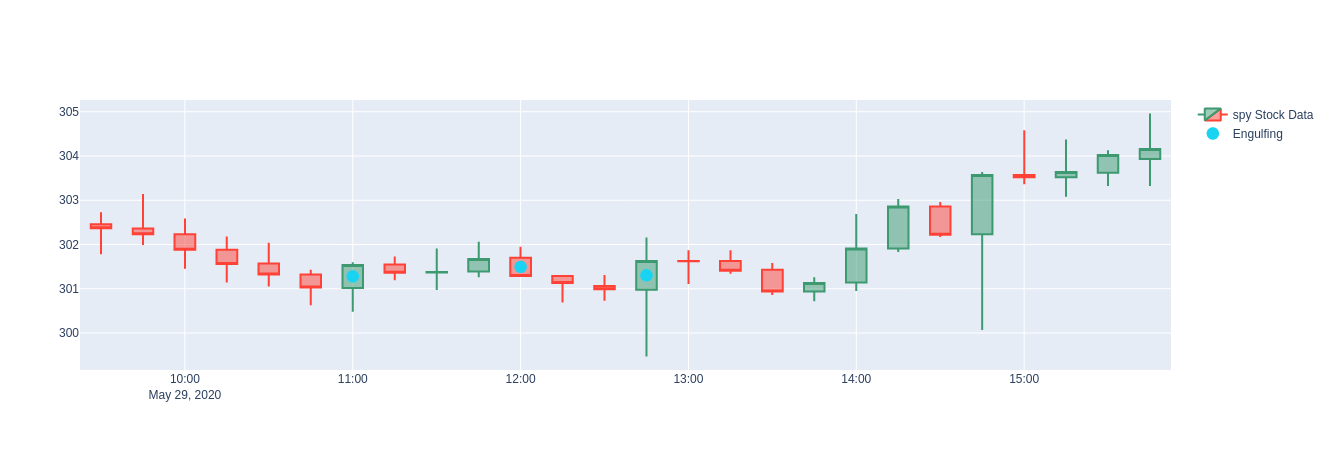

In [10]:
fig = go.Figure(data=[candle_trace, crow_trace, knight_trace, mstars_trace, estars_trace, engulf_trace])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()